# Detection of Fraud Credit Crad

The aim of this project is the detect the accuracy of fraud credict card with the help of the dataset.
The dataset contains many confidential features ,therefore the features name are not specified.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

# Data Analysis

In [2]:
df=pd.read_csv("creditcard.csv")
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
credit=pd.DataFrame(df)

In [4]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
credit.shape

(284807, 31)

Taking so many features as input may result in overfitting. Therefore with the help of PCA transformation we will convert in 4 features.

In [7]:
z=credit.drop(["Time","Amount","Class"],axis=1)

In [8]:
pca=PCA(n_components=4) 
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
x=pca.fit_transform(z)

In [10]:
X=pd.DataFrame(data=x,columns=["feature1","feature2","feature3","feature4"])
X.head()

,feature1,feature2,feature3,feature4
0,1.360553,0.075324,-2.522640,1.361667
1,-1.190035,-0.259888,-0.147287,0.402623
2,1.355485,1.337214,-1.761262,0.433266
3,0.963848,0.181846,-1.793263,-0.824277
4,1.159307,-0.872635,-1.536692,0.366130


In [11]:
p=credit.drop(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27' ],axis=1)

In [12]:
k=p.drop(['V28','Class'],axis=1)
k.head()

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99


In [13]:
X=pd.concat([X,k],axis=1)
X.head()

,feature1,feature2,feature3,feature4,Time,Amount
0,1.360553,0.075324,-2.522640,1.361667,0.0,149.62
1,-1.190035,-0.259888,-0.147287,0.402623,0.0,2.69
2,1.355485,1.337214,-1.761262,0.433266,1.0,378.66
3,0.963848,0.181846,-1.793263,-0.824277,1.0,123.50
4,1.159307,-0.872635,-1.536692,0.366130,2.0,69.99


In [14]:
y=p["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

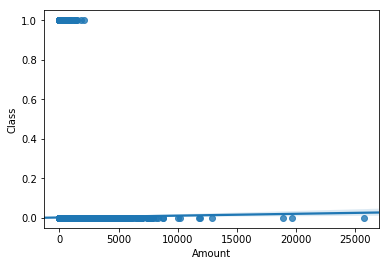

In [15]:
sns.regplot(x="Amount",y="Class",data=credit)

As the dataset has a binary class.We should opt for Logistion Regression.

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Niraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
prediction=logmodel.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
pd.DataFrame(prediction,y_test)

,0
Class,
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0


In [20]:
het=pd.DataFrame(confusion_matrix(y_test,prediction))
het

,0,1
0,85286,22
1,91,44


In [21]:
accuracy_score(y_test,prediction)*100

99.86774808936953

# Logistic Regression prefectly fit to this dataset.